In [16]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import joblib

In [18]:
diamonds = pd.read_csv('diamonds_original.csv')

In [19]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,"(5000, 10000]",206.381695
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,"[0, 5000]",132.448481
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,"[0, 5000]",91.852998
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,"(5000, 10000]",244.225457
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,"[0, 5000]",54.409255
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,"[0, 5000]",164.401114
52326,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,"[0, 5000]",150.779702
52327,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,"[0, 5000]",49.969445
52328,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,"[0, 5000]",59.282040


In [20]:
feature_names = ['carat', 'clarity', 'color',	'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [21]:
X = diamonds[feature_names]
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,206.381695
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,132.448481
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,91.852998
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,244.225457
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,54.409255
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,164.401114
52326,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,150.779702
52327,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,49.969445
52328,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,59.282040


In [22]:
y = diamonds['class']
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

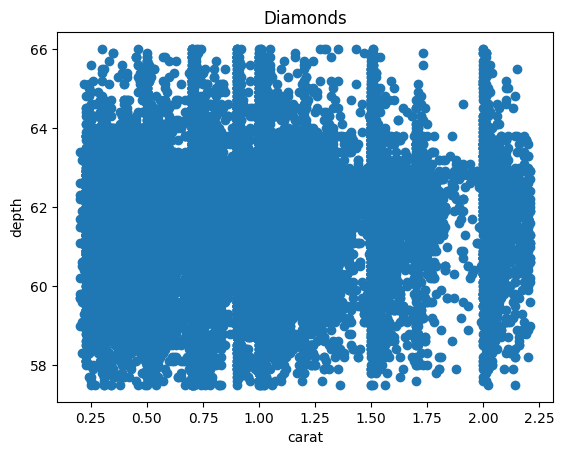

In [23]:
plt.scatter(X['carat'], X['depth'])
plt.xlabel('carat')
plt.ylabel('depth')
plt.title("Diamonds")
plt.show()

In [24]:
scaler = MinMaxScaler()

In [25]:
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,0.527363,0.285714,0.666667,0.50,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.298507,0.428571,0.666667,1.00,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.179104,0.571429,0.333333,1.00,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,0.651741,0.428571,1.000000,0.25,0.764706,0.56,0.716327,0.735656,0.824934,0.623309
4,0.064677,0.857143,0.833333,1.00,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,0.407960,0.285714,0.666667,0.50,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.363184,0.285714,0.666667,0.75,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.049751,0.571429,0.833333,1.00,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.079602,0.428571,0.333333,1.00,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


***

# Izvestaj i poredjenje modela

In [26]:
kmeans = joblib.load('KM.pkl')
kmodes = joblib.load('KMODES.pkl')
gm = joblib.load('GM.pkl')

In [27]:
models = [kmeans, kmodes, gm]
model_names = ['KMeans', 'KModes', 'GaussianMixture']

In [28]:
colors = ['#1A70C5', '#FD8109', '#09B144']

In [29]:
for model in models:
  print(type(model))

<class 'sklearn.cluster._kmeans.KMeans'>
<class 'kmodes.kmodes.KModes'>
<class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>


In [30]:
labels = []
for model in models:
  labels_ = model.fit_predict(X)
  labels.append(labels_)

labels

[array([0, 0, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 1, 0, ..., 0, 1, 0], dtype=uint16),
 array([0, 0, 1, ..., 1, 1, 0])]

###Silhouette score


Silhouette koeficijent je metrika za evaluaciju kvaliteta klasterovanja. Ova metrika meri koliko dobro je svaki objekat dodeljen odgovarajucem klasteru, uzimajuci u obzir gustinu i razdvajanje klastera. Silhouette koeficijent se izracunava za svaki objekat i predstavlja prosecnu vrednost za sve objekte u skupu podataka.
Vrednosti Silhouette koeficijenta se krecu u opsegu od -1 do 1. Vece vrednosti Silhouette koeficijenta ukazuju na bolje klasterovanje, pri cemu vrednost bliska 1 ukazuje na dobro definisane i odvojene klastera, dok vrednost bliska -1 ukazuje na objekte koji su pogresno dodeljeni klasterima.


In [31]:
silhouette_scores = []
for i in range(len(models)):
  silhouette_scores.append(silhouette_score(X, labels[i]))

silhouette_scores

[0.3184274531769023, 0.002503643163707464, 0.31632022972093726]

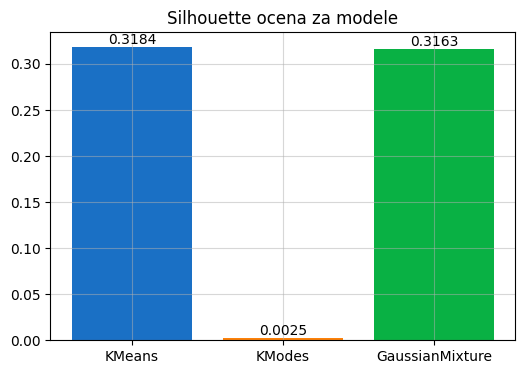

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(model_names, silhouette_scores, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(silhouette_scores):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Silhouette ocena za modele')
plt.show()

Svakako ocene nisu zadovoljavajuce da bismo mogli da kazemo da imamo neke klastere.  
Takodje treba uzeti u obzir da su Kmeans i GaussianMixture osetljivi na kategoricke promenljive te daju ovakve rezultate.  
Najrealniju sliku klasterovanja daje KModes

### Dunn index

Ova metrika meri razdvajanje izmedju klastera i gustocu objekata unutar klastera. Visoke vrednosti Dunn indeksa ukazuju na dobro odvojene klastera i dobru gustinu unutar klastera, dok niske vrednosti ukazuju na manje jasno definisane klastera i vecu rasprsenost objekata. Vrednosti Dunn indeksa se krecu u opsegu od 0 do pozitivne beskonacnosti. Vise vrednosti Dunn indeksa ukazuju na bolje klasterovanje, pri cemu vece vrednosti ukazuju na bolje razdvajanje izmedju klastera i vecu gustocu unutar klastera.

In [33]:
half_X = X.head(30000)
half_X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,0.527363,0.285714,0.666667,0.50,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.298507,0.428571,0.666667,1.00,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.179104,0.571429,0.333333,1.00,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,0.651741,0.428571,1.000000,0.25,0.764706,0.56,0.716327,0.735656,0.824934,0.623309
4,0.064677,0.857143,0.833333,1.00,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
29995,0.149254,0.428571,0.166667,0.50,0.541176,0.88,0.275510,0.290984,0.432361,0.147122
29996,0.402985,0.142857,0.166667,1.00,0.247059,0.72,0.569388,0.598361,0.631300,0.400489
29997,0.402985,0.571429,0.500000,0.50,0.670588,0.80,0.534694,0.543033,0.657825,0.379750
29998,0.064677,0.714286,0.333333,1.00,0.517647,0.40,0.140816,0.159836,0.323607,0.066002


In [34]:
half_labels = []
for i in range(len(models)):
  half_labels.append(labels[i][:30000])

len(half_labels[0])

30000

In [35]:
from scipy.spatial.distance import pdist, squareform

def dunn_index(X, labels):
    inter_cluster_dist = np.min(squareform(pdist(X))[labels != labels[:, np.newaxis]])
    intra_cluster_dist = np.max([np.max(pdist(X[labels == i])) for i in np.unique(labels)])
    dunn_index = inter_cluster_dist / intra_cluster_dist
    
    return dunn_index

In [36]:
dunn_indexes = []
for i in range(len(models)):
  dunn_indexes.append(dunn_index(half_X, half_labels[i]))

dunn_indexes

[0.0049087633764006555, 0.0008178221773402136, 0.004904175463716826]

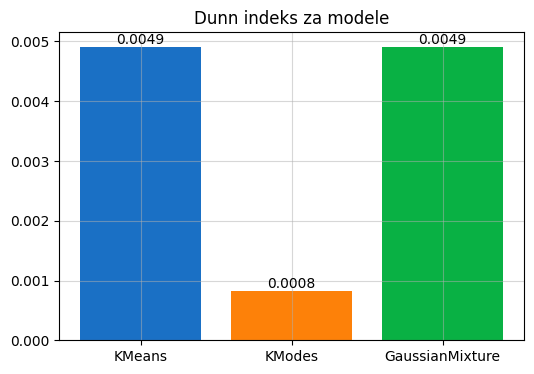

In [37]:
plt.figure(figsize=(6, 4))
plt.bar(model_names, dunn_indexes, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(dunn_indexes):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Dunn indeks za modele')
plt.show()

Lose ocene ukazuju na rasprsenost podataka i nisku gustinu "klastera"

### Rand score

Rand indeks je metrika koja se koristi za merenje slicnosti izmedju predvidjenih klastera i stvarnih klasa (ukoliko su dostupne). Ova metrika ocenjuje koliko su tacno klasteri modela uskladjeni sa pravim klasama.
Vrednosti Rand indeksa se krecu u opsegu od 0 do 1. Vece vrednosti Rand indeksa ukazuju na vecu slicnost izmedju predvidjenih klastera i stvarnih klasa, dok vrednost bliska 0 ukazuje na losu uskladjenost.


In [38]:
from sklearn.metrics import adjusted_rand_score

def calculate_rand_index(labels_true, labels_pred):
    labels_true = np.array(labels_true)
    labels_pred = np.array(labels_pred)
    rand_index = adjusted_rand_score(labels_true, labels_pred)
    
    return rand_index

In [39]:
rand_indexes = []
for i in range(len(models)):
  rand_indexes.append(calculate_rand_index(y, labels[i]))

rand_indexes

[0.3682758276431091, -0.006883371570882442, 0.3238889546726888]

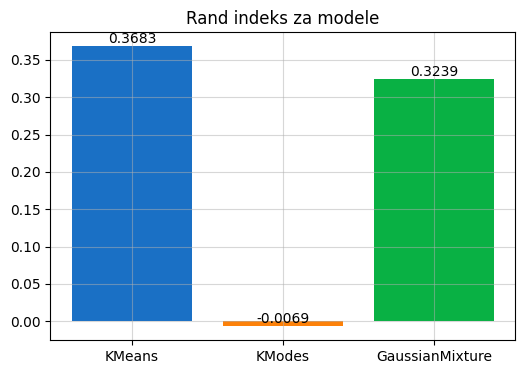

In [40]:
plt.figure(figsize=(6, 4))
plt.bar(model_names, rand_indexes, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(rand_indexes):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Rand indeks za modele')
plt.show()

Lose podudaranje klastera i pravih klasa

### Intra-cluster distances

Intra-klaster rastojanje je metrika koja se koristi za merenje prosecne udaljenosti izmedju objekata unutar istog klastera. Ova metrika ocenjuje kompaktnost i gustinu klastera tako sto racuna prosecno rastojanje izmedju svih parova objekata unutar istog klastera.
Manje vrednosti intra-klaster rastojanja ukazuju na bolje klasterovanje, jer ukazuju na to da su objekti unutar klastera blizi jedni drugima.


In [41]:
from sklearn.metrics import pairwise_distances

def calculate_intra_cluster_distance(X, labels):
    distances = pairwise_distances(X)
    intra_cluster_distance = 0.0
  
    unique_labels = set(labels)
    for label in unique_labels:
        indices = (labels == label)
        intra_cluster_distance += np.sum(distances[np.ix_(indices, indices)])
    
    return intra_cluster_distance

In [42]:
intra_distances = []
for i in range(len(models)):
  intra_distances.append(calculate_intra_cluster_distance(half_X, half_labels[i]))

intra_distances

[336000357.3365178, 470379459.7478589, 333517095.9365555]

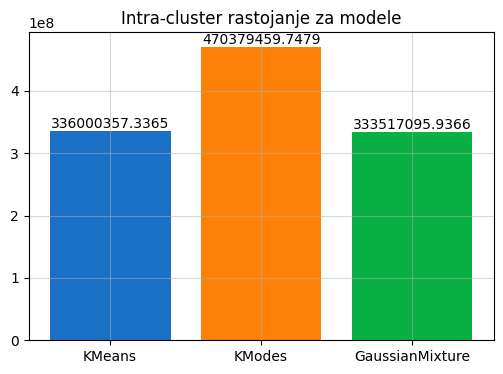

In [43]:
plt.figure(figsize=(6, 4))
plt.bar(model_names, intra_distances, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(intra_distances):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Intra-cluster rastojanje za modele')
plt.show()

Objekti unutar klastera su poprilicno udaljeni i ukazuje na slabu gustinu unutar klastera

***

### Balansiranost predvidjenih klastera

In [44]:
pieColors = ['#C99CE5', '#7FDDB3', '#7AC5E2', '#FFF4B3']

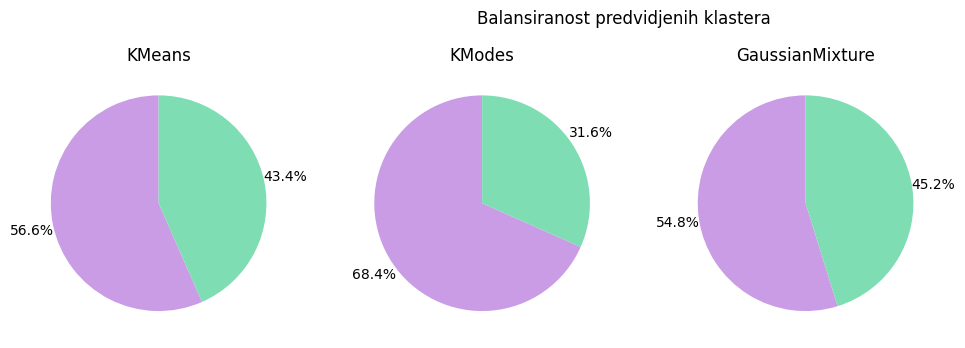

In [45]:
fig = plt.figure(figsize=(16, 4))
plt.suptitle('Balansiranost predvidjenih klastera')
idx = 1
for i, model in enumerate(models):
  
  pieData = pd.Series(labels[i]).value_counts()
  pieData.reset_index(drop=True, inplace=True)
  p = fig.add_subplot(1, 4, idx)
  idx += 1
  p.set_title(model_names[i])

  plt.pie(pieData, startangle= 90, autopct= '%.1f%%', pctdistance=1.2, colors=pieColors)

plt.show()


### Runtimes and scalability

In [46]:
import time

In [47]:
X1 = X.head(50000)
X2 = X.head(50000)

In [48]:
X1 = pd.DataFrame(scaler.fit_transform(X1), columns = feature_names)

In [49]:
data_full = pd.concat([X1, X2], ignore_index=True)
data_full.shape

(100000, 10)

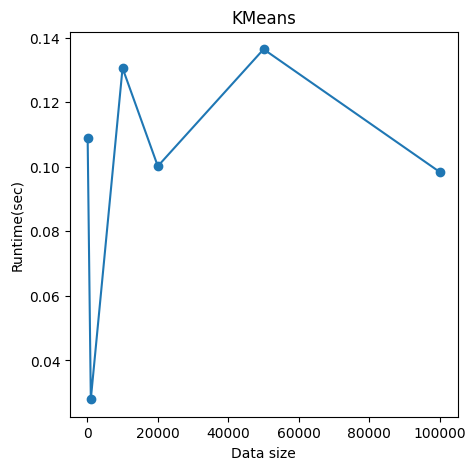

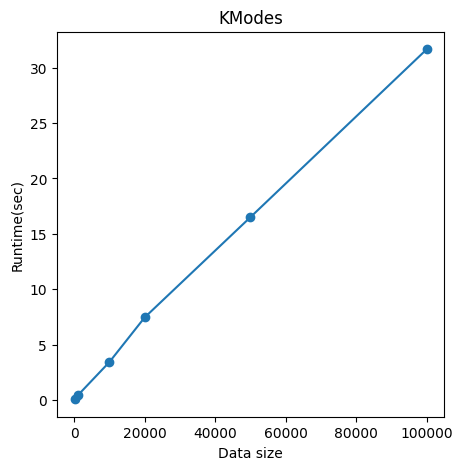

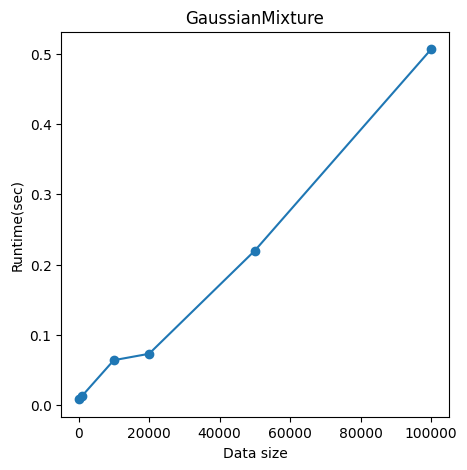

In [50]:
data_sizes = [100, 1000, 10000, 20000, 50000, 100000]
for i, model in enumerate(models):
  runtimes = []
  for size in data_sizes:
      data = data_full.head(size) 
      
      start_time = time.time()
      model.fit(data)
      end_time = time.time()
      runtime = end_time - start_time

      runtimes.append(runtime)

  plt.figure(figsize=(5, 5))
  plt.plot(data_sizes, runtimes, marker='o')
  plt.title(model_names[i])
  plt.xlabel('Data size')
  plt.ylabel('Runtime(sec)')
  plt.show()